<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2022/blob/main/Classification/ML_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Importing the libraries
import math
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt


# Plot settings

In [36]:
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 11
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['figure.figsize'] = 7,4
sns.set_style('ticks')

# Reading the data



In [37]:
# Importing the datasets
df  = pd.read_csv('emails.csv')

# y      = df.OSA.values
# x_data = df.drop(['OSA'], axis = 1)

# Display the data

In [38]:
df.shape

(5172, 3002)

In [39]:
# df.describe()

**Data Visulatization**

In [40]:
# fig, (ax1, ax2,ax3) = plt.subplots(1,3)
# fig.suptitle('Data Statistics')
# ax1.plot(OSA, 'o-')
# ax1.set_ylabel('Damped oscillation')
# ax2.plot(x2, y2, '.-')
# ax2.set_xlabel('time (s)')
# ax2.set_ylabel('Undamped')
# plt.show()

# plt.subplot(13)
# # equivalent but more general
# ax1 = plt.subplot(2, 2, 1)
# # add a subplot with no frame
# ax2 = plt.subplot(222, frameon=False)
# # add a polar subplot
# plt.subplot(223, projection='polar')

# fig, axes = plt.subplots(1,3,figsize=(7,5),sharey=True)
# sns.countplot(ax=axes[0],data=df, x='Class')
# sns.countplot(ax=axes[1],data=df, x='gender')
# sns.countplot(ax=axes[2],data=df, x='retire')
# plt.savefig('Statistics.png')


# Drop unwanted data

In [41]:
# Drop the first column
df = df.drop('Email No.', axis = 1)

In [42]:
# Drop rows with any NaN values
df = df.dropna()

In [43]:
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Class
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:xlabel='Class', ylabel='count'>

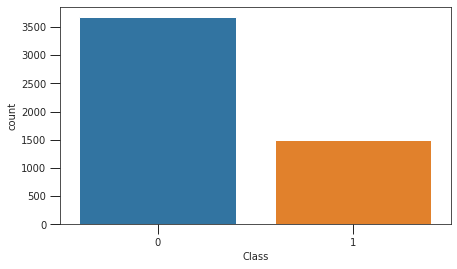

In [44]:
# Calculate the number of classes in the class
sns.countplot(data=df, x='Class')

In [45]:
from sklearn.preprocessing import StandardScaler

x_data = df.drop('Class', axis = 1)
Y = df['Class']

sc = StandardScaler()
X  = sc.fit_transform(x_data)

In [46]:
# No of samples n 
n = 1000
Y = Y[1:n,]
X = X[1:n,]

In [47]:
X.shape

(999, 3000)

In [48]:
Y.shape

(999,)

In [49]:
# features = ['Age',	'Sex',	'Height (in)'	,'Weight (lb)','BMI>30',
#                   'Neck>17','Airway MF','MF >2','BAN','AHI']
# x_data = df[features]
# y      = df['OSA']

# # Normalize data
# x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values

In [50]:
X

array([[ 0.11575699,  0.71450797,  1.33733653, ..., -0.0562853 ,
         0.03067224, -0.07097072],
       [-0.56544926, -0.64908256, -0.2938948 , ..., -0.0562853 ,
        -0.32904848, -0.07097072],
       [-0.56544926, -0.12462466,  1.19549033, ..., -0.0562853 ,
        -0.32904848, -0.07097072],
       ...,
       [-0.13969536,  0.0851585 ,  0.62810552, ..., -0.0562853 ,
         0.39039297, -0.07097072],
       [ 0.11575699, -0.33440782, -0.2229717 , ..., -0.0562853 ,
        -0.32904848, -0.07097072],
       [-0.56544926, -0.64908256, -0.2938948 , ..., -0.0562853 ,
        -0.32904848, -0.07097072]])

## Correlation between different variables

In [51]:
# # Correlation heatmap with mask for upper traingle
# # Correlation between different variables
# corr = df.corr()
# # Set up the matplotlib plot configuration
# f, ax = plt.subplots(figsize=(10, 6))
# # Generate a mask for upper traingle
# mask = np.triu(np.ones_like(corr, dtype=bool))
# # Configure a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# # Draw the heatmap
# sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
# plt.savefig('Heatmap.png')


## Class distribution in Spam dataset

In [52]:
# fig, axs = plt.subplots(figsize=(10, 4), tight_layout=True)
# sns.boxplot(data=df)
# plt.show()

# sns.pairplot(df, vars=["age","income","tenure","Class"])
# plt.grid()
# plt.savefig('Correction with Class Satisfication.png')
# plt.show()


# Preparing data for machine learning

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25,random_state=42)

In [58]:
def calculate_confusion(name,y_train, y_pred_train, y_test, y_pred_test):
  
  # Making the Confusion Matrix
  # from sklearn.metrics import confusion_matrix
  # from sklearn.metrics import plot_confusion_matrix
  
  cm1   = confusion_matrix(y_train, y_pred_train)
  cm2  = confusion_matrix(y_test, y_pred_test)

  test_calc = pd.concat([pd.DataFrame(y_train).reset_index(drop=True),pd.DataFrame(y_pred_train).reset_index(drop=True)],axis=1)
  test_calc.rename(columns={0: 'predicted'}, inplace=True)

  Accuracy1  = (cm1[0,0] + cm1[1,1]) / (cm1[0,0] + cm1[0,1] + cm1[1,0] + cm1[1,1])
  precision1  = cm1[1,1] / (cm1[1,1] + cm1[0,1])
  recall1        = cm1[1,1] / (cm1[1,1] + cm1[1,0])

  print('Performance Criteria in Training Case for %s' %name)
  print('Accuracy  %.3f' %Accuracy1)
  print ('precision %.3f' % precision1)
  print('recall %.3f' % recall1)

  #########################################
  test_calc = pd.concat([pd.DataFrame(y_train).reset_index(drop=True),pd.DataFrame(y_pred_train).reset_index(drop=True)],axis=1)
  test_calc.rename(columns={0: 'predicted'}, inplace=True)

  Accuracy2 = (cm2[0,0] + cm2[1,1]) / (cm2[0,0] + cm2[0,1] + cm2[1,0] + cm2[1,1])
  precision2 = cm2[1,1] / (cm2[1,1] + cm2[0,1])
  recall2       = cm2[1,1] / (cm2[1,1] + cm2[1,0])

  print('====================')
  print('Performance Criteria in Testing Case for %s' %name)
  print('Accuracy  %.3f' %Accuracy2)
  print ('precision %.3f' % precision2)
  print('recall %.3f' % recall2)

  cm_train = pd.DataFrame(cm1, range(2), range(2))
  cm_test  = pd.DataFrame(cm2, range(2), range(2))

  f,(ax1,ax2) = plt.subplots(1,2,figsize=(7, 3), sharey=True)
  g1 = sns.heatmap(cm_train,cbar=False,ax=ax1,annot=True, fmt=".1f",cmap="viridis",annot_kws={"size": 15})
  g1.set_title('Training case',fontname= 'serif',fontsize=10, color='k')
  g2 = sns.heatmap(cm_test,cbar=False,ax=ax2,annot=True, fmt=".1f",cmap="viridis",annot_kws={"size": 15})
  g2.set_title('Testing case', fontname= 'serif',fontsize=10, color='k')
  f.suptitle(' Confusion matrix for '+name, fontsize=11)
  plt.savefig(name + ".png")
  plt.show()

In [55]:
!conda update -c conda-forge scikit-learn

/bin/bash: conda: command not found


Performance Criteria in Training Case for LR
Accuracy  1.000
precision 1.000
recall 1.000
Performance Criteria in Testing Case for LR
Accuracy  0.956
precision 0.870
recall 0.985


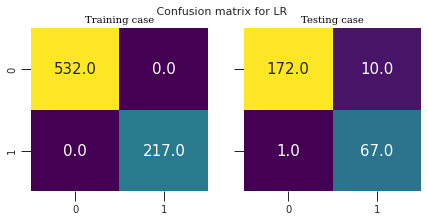

In [59]:
#set up plotting area
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# We now prepare our selected models
models  = []
results   = []
names   = []
scoring  = 'accuracy'
names   = ['LRC', 'SVC', 'GBC', 'GNB', 'RFC', 'KNC']

#LogisticRegression ####################################
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', max_iter=20)
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)
calculate_confusion("LR",y_train, y_pred_train, y_test, y_pred_test)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(lr, x_train, y_train)
results.append(cv_results)  


Performance Criteria in Training Case for SVM
Accuracy  0.921
precision 1.000
recall 0.728
Performance Criteria in Testing Case for SVM
Accuracy  0.876
precision 1.000
recall 0.544


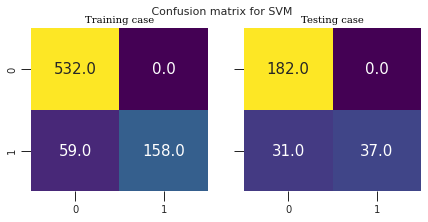

In [60]:
#SVM ####################################
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_pred_train = svm.predict(x_train)
y_pred_test  = svm.predict(x_test)
calculate_confusion("SVM",y_train, y_pred_train, y_test, y_pred_test)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(svm, x_train, y_train)
results.append(cv_results)


Performance Criteria in Training Case for GBC
Accuracy  1.000
precision 1.000
recall 1.000
Performance Criteria in Testing Case for GBC
Accuracy  0.952
precision 0.952
recall 0.868


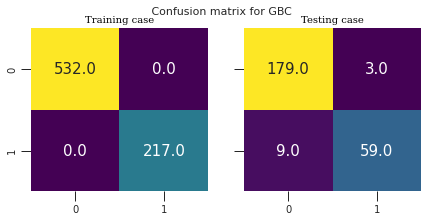

In [61]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
y_pred_train = GBC.predict(x_train)
y_pred_test  = GBC.predict(x_test)
calculate_confusion("GBC",y_train, y_pred_train, y_test, y_pred_test)
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GBC, x_train, y_train)
results.append(cv_results)

Performance Criteria in Training Case for GNB
Accuracy  0.977
precision 0.927
recall 1.000
Performance Criteria in Testing Case for GNB
Accuracy  0.944
precision 0.875
recall 0.926


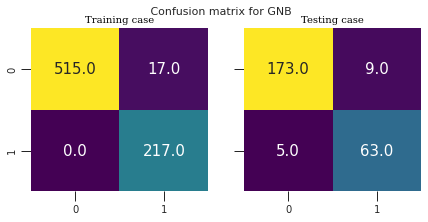

In [62]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)
y_pred_train = GNB.predict(x_train)
y_pred_test  = GNB.predict(x_test)
calculate_confusion("GNB",y_train, y_pred_train, y_test, y_pred_test)
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GNB, x_train, y_train)
results.append(cv_results)

Performance Criteria in Training Case for KNC
Accuracy  0.789
precision 0.582
recall 0.968
Performance Criteria in Testing Case for KNC
Accuracy  0.676
precision 0.456
recall 0.985


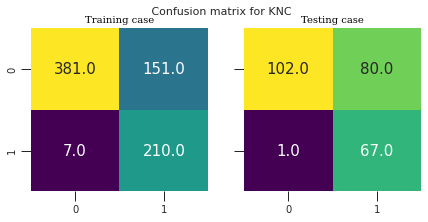

In [63]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(x_train, y_train)
y_pred_train = KNC.predict(x_train)
y_pred_test  = KNC.predict(x_test)
calculate_confusion("KNC",y_train, y_pred_train, y_test, y_pred_test)
fpr5, tpr5, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(KNC, x_train, y_train)
results.append(cv_results)

Performance Criteria in Training Case for DT
Accuracy  1.000
precision 1.000
recall 1.000
Performance Criteria in Testing Case for DT
Accuracy  0.900
precision 0.812
recall 0.824


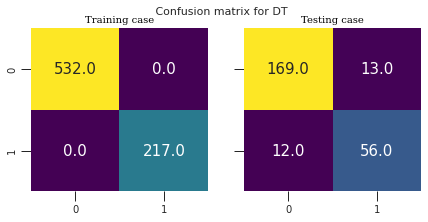

In [64]:
# Decision Tree Model
from sklearn import tree
DT = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None)
DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
y_pred_test  = DT.predict(x_test)
calculate_confusion("DT",y_train, y_pred_train, y_test, y_pred_test)
fpr6, tpr6, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(DT, x_train, y_train)
results.append(cv_results)

Performance Criteria in Training Case for RFC
Accuracy  1.000
precision 1.000
recall 1.000
Performance Criteria in Testing Case for RFC
Accuracy  0.968
precision 0.984
recall 0.897


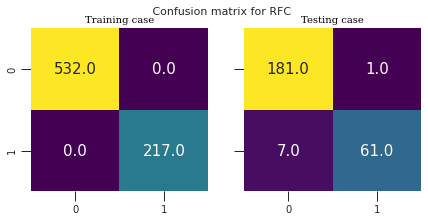

In [65]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None)
RFC.fit(x_train, y_train)
y_pred_train = RFC.predict(x_train)
y_pred_test  = RFC.predict(x_test)
calculate_confusion("RFC",y_train, y_pred_train, y_test, y_pred_test)
fpr7, tpr7, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(RFC, x_train, y_train)
results.append(cv_results)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Performance Criteria in Training Case for ANN
Accuracy  0.999
precision 1.000
recall 0.995
Performance Criteria in Testing Case for ANN
Accuracy  0.928
precision 0.791
recall 1.000


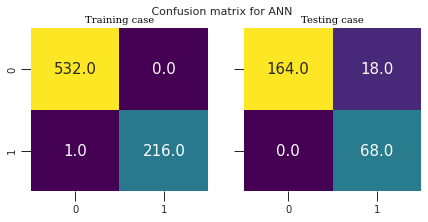

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

In [66]:
#Artificial Neural Network
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='adam', max_iter= 500, alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
ANN.fit(x_train, y_train)
y_pred_train = ANN.predict(x_train)
y_pred_test  = ANN.predict(x_test)
calculate_confusion("ANN",y_train, y_pred_train, y_test, y_pred_test)
fpr8, tpr8, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(ANN, x_train, y_train)
results.append(cv_results)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


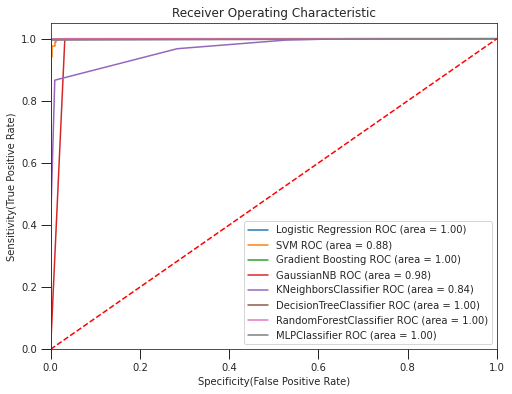

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model':  LogisticRegression(),
},
{
    'label': 'SVM',
    'model':  SVC(gamma='auto', probability=True),
},
{
    'label': 'Gradient Boosting',
    'model':  GradientBoostingClassifier(),
},
{
    'label': 'GaussianNB',
    'model':  GaussianNB(),
},
{
    'label': 'KNeighborsClassifier',
    'model':  KNeighborsClassifier(),
},
{
    'label': 'DecisionTreeClassifier',
    'model':  tree.DecisionTreeClassifier(),
},
{
    'label': 'RandomForestClassifier',
    'model':  RandomForestClassifier(),
},
{
    'label': 'MLPClassifier',
    'model':  MLPClassifier(solver='adam', max_iter= 500, alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data

# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_train, model.predict_proba(x_train)[:,1])

# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_train,model.predict(x_train))
    
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_Curves.png')
plt.show()   # Display


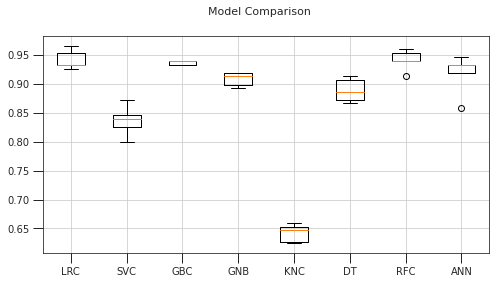

In [68]:
# Boxplot of the mean results of each supervised model for comparison 
names = ['LRC', 'SVC', 'GBC', 'GNB', 'KNC', 'DT','RFC', 'ANN']
fig = plt.figure(figsize=(8,4))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.savefig('BoxPlot_Curves.png')
plt.show()